# Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

# Gerando os dataframes

## FII's - Relatórios trimestrais

In [2]:
fiis = pd.read_csv('inf_trimestral_fii.csv', encoding = "ISO-8859-1", sep = ';')

In [3]:
fiis['Valor'] = fiis['Valor'] / 100
fiis.head()

,CNPJ_Fundo,Data_Referencia,Tipo,Emissor,CNPJ_Emissor,Valor
0,01.235.622/0001-61,31/03/2022,FII,BRIX Fundo de investimento Imobiliário,35360651000177,11142491.43
1,01.235.622/0001-61,31/03/2022,FII,Dovel Fundo de Investimento Imobiliário,10522648000181,57977871.76
2,01.235.622/0001-61,30/06/2022,FII,OPPORTUNITY BALASSIANO FUNDO DE INVESTIMENTO I...,42273290000197,30855094.85
3,01.235.622/0001-61,30/06/2022,FII,BRIX Fundo de investimento Imobiliário,35360651000177,2542107.98
4,01.235.622/0001-61,30/06/2022,FII,Dovel Fundo de Investimento Imobiliário,10522648000181,67462992.65


In [4]:
fiis['Data_Referencia'].unique()

array(['31/03/2022', '30/06/2022', '30/09/2022'], dtype=object)

In [5]:
fiis['CNPJ_Emissor'] = fiis['CNPJ_Emissor'].astype(str)

## CNPJ FII's

In [6]:
lista_cnpj = []

for i in fiis['CNPJ_Emissor']:

    i = i.replace('.', '')
    i = i.replace('/', '')
    i = i.replace('-', '')
    if len(i) == 13:
        i = '0' + i
    elif len(i) == 12:
        i = '00' + i
    elif len(i) == 11:
        i = '000' + i

    cnpj = '{}.{}.{}/{}-{}'.format(i[:2], i[2:5], i[5:8], i[8:12], i[12:])
    lista_cnpj.append(cnpj)

In [7]:
fiis['CNPJ_Emissor'] = lista_cnpj
fiis.head()

,CNPJ_Fundo,Data_Referencia,Tipo,Emissor,CNPJ_Emissor,Valor
0,01.235.622/0001-61,31/03/2022,FII,BRIX Fundo de investimento Imobiliário,35.360.651/0001-77,11142491.43
1,01.235.622/0001-61,31/03/2022,FII,Dovel Fundo de Investimento Imobiliário,10.522.648/0001-81,57977871.76
2,01.235.622/0001-61,30/06/2022,FII,OPPORTUNITY BALASSIANO FUNDO DE INVESTIMENTO I...,42.273.290/0001-97,30855094.85
3,01.235.622/0001-61,30/06/2022,FII,BRIX Fundo de investimento Imobiliário,35.360.651/0001-77,2542107.98
4,01.235.622/0001-61,30/06/2022,FII,Dovel Fundo de Investimento Imobiliário,10.522.648/0001-81,67462992.65


In [8]:
cnpj_fiis = pd.read_excel('CNPJ_fiis.xlsx')
cnpj_fiis.rename(columns = {'CNPJ': 'CNPJ_Emissor'}, inplace = True)
cnpj_fiis.head()

,Ticker,CNPJ_Emissor
0,ABCP11,01.201.140/0001-90
1,AFHI11,36.642.293/0001-58
2,AFOF11,34.847.063/0001-08
3,AIEC11,35.765.826/0001-26
4,ALMI11,07.122.725/0001-00


## Segmentos FII's

In [9]:
segmentos = pd.read_csv('inf_trimestral_fii_geral_2022.csv', encoding = "ISO-8859-1", sep = ';',
                       usecols = ['CNPJ_Fundo', 'Segmento_Atuacao'])
segmentos

,CNPJ_Fundo,Segmento_Atuacao
0,00.332.266/0001-31,Shoppings
1,00.332.266/0001-31,Shoppings
2,00.332.266/0001-31,Shoppings
3,00.613.094/0001-74,Híbrido
4,00.613.094/0001-74,Híbrido
...,...,...
1846,97.521.194/0001-02,NaN
1847,97.521.194/0001-02,NaN
1848,97.521.194/0001-02,NaN
1849,97.521.225/0001-25,Híbrido


In [10]:
cnpj_fiis = pd.merge(cnpj_fiis, segmentos, how = 'inner', left_on = 'CNPJ_Emissor', right_on = 'CNPJ_Fundo')
cnpj_fiis.drop(columns = {'CNPJ_Fundo'}, inplace = True)
cnpj_fiis

,Ticker,CNPJ_Emissor,Segmento_Atuacao
0,ABCP11,01.201.140/0001-90,Shoppings
1,ABCP11,01.201.140/0001-90,Shoppings
2,AFHI11,36.642.293/0001-58,Títulos e Val. Mob.
3,AFHI11,36.642.293/0001-58,Títulos e Val. Mob.
4,AFHI11,36.642.293/0001-58,Títulos e Val. Mob.
...,...,...,...
979,MGRI11,41.320.997/0001-44,Títulos e Val. Mob.
980,FRHY11,41.251.077/0001-11,Outros
981,FRHY11,41.251.077/0001-11,Híbrido
982,HDOF11,35.688.460/0001-39,Lajes Corporativas


## Consolidado

In [11]:
fiis = pd.merge(fiis, cnpj_fiis, how = 'outer', on = 'CNPJ_Emissor')
fiis = pd.merge(fiis, cnpj_fiis, how = 'outer', left_on = 'CNPJ_Fundo', right_on = 'CNPJ_Emissor', 
                        suffixes= ('','_comprador'))
fiis.drop(columns = {'CNPJ_Emissor_comprador'}, inplace = True)

fiis = fiis[~fiis['Valor'].isna()]
fiis.drop_duplicates(inplace = True)
fiis

,CNPJ_Fundo,Data_Referencia,Tipo,Emissor,CNPJ_Emissor,Valor,Ticker,Segmento_Atuacao,Ticker_comprador,Segmento_Atuacao_comprador
0,01.235.622/0001-61,31/03/2022,FII,BRIX Fundo de investimento Imobiliário,35.360.651/0001-77,1.114249e+07,BRIX11,Títulos e Val. Mob.,FTCE11B,Híbrido
9,01.235.622/0001-61,30/06/2022,FII,BRIX Fundo de investimento Imobiliário,35.360.651/0001-77,2.542108e+06,BRIX11,Títulos e Val. Mob.,FTCE11B,Híbrido
18,01.235.622/0001-61,30/06/2022,FII,BRIX Fundo de investimento Imobiliário - SÊNIOR,35.360.651/0001-77,1.038069e+07,BRIX11,Títulos e Val. Mob.,FTCE11B,Híbrido
27,01.235.622/0001-61,30/06/2022,FII,BRIX Fundo de investimento Imobiliário - MEZANINO,35.360.651/0001-77,1.074172e+07,BRIX11,Títulos e Val. Mob.,FTCE11B,Híbrido
36,01.235.622/0001-61,30/09/2022,FII,BRIX Fundo de investimento Imobiliário - MEZANINO,35.360.651/0001-77,1.434703e+07,BRIX11,Títulos e Val. Mob.,FTCE11B,Híbrido
...,...,...,...,...,...,...,...,...,...,...
38437,41.269.052/0001-45,31/03/2022,FII,FII DE UNIDADES AUTÔNOMAS,37.774.914/0001-04,1.019602e+06,NaN,NaN,GAME11,Outros
38439,41.269.052/0001-45,30/06/2022,FII,FII DE UNIDADES AUTÔNOMAS,37.774.914/0001-04,8.240824e+04,NaN,NaN,GAME11,Outros
38441,42.405.905/0001-91,30/06/2022,FII,FIAGRO VGIA - VGIA11,41.081.088/0001-09,1.501267e+06,NaN,NaN,NaN,NaN
38442,42.405.905/0001-91,30/06/2022,FII,FIAGRO RIZA - RZAG11,40.413.979/0001-44,3.585323e+05,NaN,NaN,NaN,NaN


# Dataframes 06/2022

In [12]:
fiis_06_2022 = fiis[fiis['Data_Referencia'] == '30/06/2022']
fiis_06_2022.head()

,CNPJ_Fundo,Data_Referencia,Tipo,Emissor,CNPJ_Emissor,Valor,Ticker,Segmento_Atuacao,Ticker_comprador,Segmento_Atuacao_comprador
9,01.235.622/0001-61,30/06/2022,FII,BRIX Fundo de investimento Imobiliário,35.360.651/0001-77,2542107.98,BRIX11,Títulos e Val. Mob.,FTCE11B,Híbrido
18,01.235.622/0001-61,30/06/2022,FII,BRIX Fundo de investimento Imobiliário - SÊNIOR,35.360.651/0001-77,10380689.61,BRIX11,Títulos e Val. Mob.,FTCE11B,Híbrido
27,01.235.622/0001-61,30/06/2022,FII,BRIX Fundo de investimento Imobiliário - MEZANINO,35.360.651/0001-77,10741720.91,BRIX11,Títulos e Val. Mob.,FTCE11B,Híbrido
72,01.235.622/0001-61,30/06/2022,FII,Dovel Fundo de Investimento Imobiliário,10.522.648/0001-81,67462992.65,DOVL11B,Lajes Corporativas,FTCE11B,Híbrido
90,01.235.622/0001-61,30/06/2022,FII,OPPORTUNITY BALASSIANO FUNDO DE INVESTIMENTO I...,42.273.290/0001-97,30855094.85,NaN,NaN,FTCE11B,Híbrido


In [13]:
pivot_06_2022 = pd.pivot_table(fiis_06_2022, values='Valor', index=['Ticker', 'Ticker_comprador', 
                                                                    'Segmento_Atuacao', 'Segmento_Atuacao_comprador'])
pivot_06_2022 = pivot_06_2022.reset_index()
pivot_06_2022

,Ticker,Ticker_comprador,Segmento_Atuacao,Segmento_Atuacao_comprador,Valor
0,ABCP11,HGBS11,Shoppings,Shoppings,6433289.09
1,ABCP11,ITIT11,Shoppings,Títulos e Val. Mob.,100117.08
2,ABCP11,RVBI11,Shoppings,Títulos e Val. Mob.,192072.29
3,AFHI11,AFOF11,Títulos e Val. Mob.,Títulos e Val. Mob.,69.86
4,AFHI11,BLMR11,Títulos e Val. Mob.,Títulos e Val. Mob.,139.72
...,...,...,...,...,...
2259,XTED11,CPFF11,Lajes Corporativas,Títulos e Val. Mob.,832576.96
2260,XTED11,CPTS11,Lajes Corporativas,Títulos e Val. Mob.,61745.44
2261,XTED11,HFOF11,Lajes Corporativas,Títulos e Val. Mob.,197976.96
2262,YUFI11,HGFF11,Residencial,Títulos e Val. Mob.,102981.89


## Principais FII's negociados por valor de mercado

In [14]:
group_06_2022_valor = fiis_06_2022[['Valor', 'Ticker']].groupby(by = 'Ticker').agg(func=[np.sum])
group_06_2022_valor.sort_values(by = ('Valor', 'sum'), ascending = False, inplace = True)
group_06_2022_valor = group_06_2022_valor.iloc[:10]
group_06_2022_valor

,Valor
,sum
Ticker,
SPVJ11,5.981268e+08
TMFI11,4.831776e+08
MSHP11,4.252311e+08
SHDP11B,4.079320e+08
RBRL11,3.238605e+08
SRVD11,2.934449e+08
KNCR11,2.910403e+08
KNIP11,2.859727e+08


In [15]:
pivot_06_2022_valor = pd.merge(pivot_06_2022, group_06_2022_valor, how = 'inner', left_on = 'Ticker', 
                               right_on = group_06_2022_valor.index)
pivot_06_2022_valor.drop(columns = {('Valor', 'sum')}, inplace = True)
pivot_06_2022_valor

,Ticker,Ticker_comprador,Segmento_Atuacao,Segmento_Atuacao_comprador,Valor
0,BRCR11,BBFO11,Híbrido,Títulos e Val. Mob.,1.049456e+07
1,BRCR11,BCFF11,Híbrido,Títulos e Val. Mob.,5.477760e+06
2,BRCR11,BCIA11,Híbrido,Títulos e Val. Mob.,1.063697e+07
3,BRCR11,BLMR11,Híbrido,Títulos e Val. Mob.,9.540839e+06
4,BRCR11,BPFF11,Híbrido,Títulos e Val. Mob.,1.291025e+05
...,...,...,...,...,...
163,SPVJ11,XPSF11,Outros,Títulos e Val. Mob.,8.069577e+06
164,SRVD11,HCTR11,Títulos e Val. Mob.,Títulos e Val. Mob.,1.817734e+08
165,SRVD11,IRDM11,Títulos e Val. Mob.,Títulos e Val. Mob.,2.392839e+05
166,SRVD11,TORD11,Títulos e Val. Mob.,Outros,1.114322e+08


In [16]:
group_06_2022_valor = pd.merge(group_06_2022_valor, pivot_06_2022_valor, how = 'inner', 
                               left_on = group_06_2022_valor.index, right_on = 'Ticker')
group_06_2022_valor.drop(columns = {'Ticker_comprador', 'Segmento_Atuacao_comprador', 'Valor'}, inplace = True)
group_06_2022_valor.rename(columns = {('Valor', 'sum'): 'Valor'}, inplace = True)
group_06_2022_valor = group_06_2022_valor.drop_duplicates()
group_06_2022_valor = group_06_2022_valor.reset_index(drop = True)
group_06_2022_valor

,Valor,Ticker,Segmento_Atuacao
0,5.981268e+08,SPVJ11,Outros
1,4.831776e+08,TMFI11,Híbrido
2,4.252311e+08,MSHP11,Híbrido
3,4.079320e+08,SHDP11B,Shoppings
4,3.238605e+08,RBRL11,Logística
5,2.934449e+08,SRVD11,Títulos e Val. Mob.
6,2.910403e+08,KNCR11,Títulos e Val. Mob.
7,2.859727e+08,KNIP11,Títulos e Val. Mob.
8,2.781297e+08,GALG11,Híbrido
9,2.355030e+08,BRCR11,Híbrido


## Principais FII's negociados por quantidade de negociações

In [17]:
dicio_pivot_qt = {}
for i in pivot_06_2022.Ticker:
    dicio_pivot_qt[i] = len(pivot_06_2022[pivot_06_2022['Ticker'] == i]) 

In [18]:
group_06_2022_qt = pivot_06_2022.groupby(by = 'Ticker').sum()
group_06_2022_qt = group_06_2022_qt.reset_index(drop = False)

In [19]:
group_06_2022_qt['Quantidade'] = dicio_pivot_qt.values()
group_06_2022_qt

,Ticker,Valor,Quantidade
0,ABCP11,6725478.46,3
1,AFHI11,23113.68,8
2,AIEC11,71879565.25,23
3,ALMI11,204039.00,8
4,ALZR11,2844666.71,10
...,...,...,...
275,XPML11,15574399.57,29
276,XPPR11,10302688.51,12
277,XPSF11,4208.88,2
278,XTED11,1092299.36,3


In [20]:
group_06_2022_qt = pd.merge(group_06_2022_qt, pivot_06_2022, how = 'inner',
                           left_on = 'Ticker', right_on = 'Ticker')

group_06_2022_qt.drop(columns = {'Ticker_comprador', 'Segmento_Atuacao_comprador', 'Valor_y'}, inplace = True)
group_06_2022_qt.rename(columns = {'Valor_x': 'Valor'}, inplace = True)
group_06_2022_qt = group_06_2022_qt.drop_duplicates()

group_06_2022_qt.sort_values(by = 'Quantidade', ascending = False, inplace = True)
group_06_2022_qt = group_06_2022_qt.iloc[0:11]

group_06_2022_qt = group_06_2022_qt.drop(labels = [275], axis = 0)
group_06_2022_qt = group_06_2022_qt.reset_index(drop = True)

group_06_2022_qt

,Ticker,Valor,Quantidade,Segmento_Atuacao
0,KNCR11,2.810687e+08,39,Títulos e Val. Mob.
1,BTLG11,4.290614e+06,38,Logística
2,KNIP11,2.832488e+08,36,Títulos e Val. Mob.
3,CPTS11,2.189468e+08,34,Títulos e Val. Mob.
4,JSRE11,1.908573e+08,32,Híbrido
5,BRCR11,2.355030e+08,31,Híbrido
6,MCCI11,2.709721e+07,30,Títulos e Val. Mob.
7,HSML11,1.862630e+08,30,Shoppings
8,VRTA11,7.373846e+06,30,Títulos e Val. Mob.
9,XPLG11,1.691865e+08,30,Outros


# Dataframes 09/2022

In [21]:
fiis_09_2022 = fiis[fiis['Data_Referencia'] == '30/09/2022']
fiis_09_2022.head()

,CNPJ_Fundo,Data_Referencia,Tipo,Emissor,CNPJ_Emissor,Valor,Ticker,Segmento_Atuacao,Ticker_comprador,Segmento_Atuacao_comprador
36,01.235.622/0001-61,30/09/2022,FII,BRIX Fundo de investimento Imobiliário - MEZANINO,35.360.651/0001-77,14347027.58,BRIX11,Títulos e Val. Mob.,FTCE11B,Híbrido
45,01.235.622/0001-61,30/09/2022,FII,BRIX Fundo de investimento Imobiliário - SÊNIOR,35.360.651/0001-77,12071559.27,BRIX11,Títulos e Val. Mob.,FTCE11B,Híbrido
54,01.235.622/0001-61,30/09/2022,FII,BRIX Fundo de investimento Imobiliário,35.360.651/0001-77,251104.89,BRIX11,Títulos e Val. Mob.,FTCE11B,Híbrido
81,01.235.622/0001-61,30/09/2022,FII,Dovel Fundo de Investimento Imobiliário,10.522.648/0001-81,68185782.27,DOVL11B,Lajes Corporativas,FTCE11B,Híbrido
93,01.235.622/0001-61,30/09/2022,FII,OPPORTUNITY BALASSIANO FUNDO DE INVESTIMENTO I...,42.273.290/0001-97,38879657.56,NaN,NaN,FTCE11B,Híbrido


In [22]:
pivot_09_2022 = pd.pivot_table(fiis_09_2022, values='Valor', index=['Ticker', 'Ticker_comprador', 
                                                                    'Segmento_Atuacao', 'Segmento_Atuacao_comprador'])
pivot_09_2022 = pivot_09_2022.reset_index()
pivot_09_2022

,Ticker,Ticker_comprador,Segmento_Atuacao,Segmento_Atuacao_comprador,Valor
0,ABCP11,ITIT11,Shoppings,Títulos e Val. Mob.,57710.24
1,ABCP11,RVBI11,Shoppings,Títulos e Val. Mob.,2028470.77
2,AFHI11,AFOF11,Títulos e Val. Mob.,Títulos e Val. Mob.,6.79
3,AFHI11,BLMR11,Títulos e Val. Mob.,Títulos e Val. Mob.,135.80
4,AFHI11,HSAF11,Títulos e Val. Mob.,Títulos e Val. Mob.,13.58
...,...,...,...,...,...
1256,XPSF11,IRDM11,Títulos e Val. Mob.,Títulos e Val. Mob.,39761.28
1257,XPSF11,RFOF11,Títulos e Val. Mob.,Títulos e Val. Mob.,767.00
1258,XTED11,CPFF11,Lajes Corporativas,Títulos e Val. Mob.,1027520.75
1259,XTED11,CPTS11,Lajes Corporativas,Títulos e Val. Mob.,736708.75


## Principais FII's negociados por valor de mercado

In [23]:
group_09_2022_valor = fiis_09_2022[['Valor', 'Ticker']].groupby(by = 'Ticker').agg(func=[np.sum])
group_09_2022_valor.sort_values(by = ('Valor', 'sum'), ascending = False, inplace = True)
group_09_2022_valor = group_09_2022_valor.iloc[:10]
group_09_2022_valor

,Valor
,sum
Ticker,
TMFI11,4.832610e+08
MSHP11,4.160094e+08
SPVJ11,2.378824e+08
RBRL11,2.212903e+08
DEVA11,1.713883e+08
ERCR11,1.462146e+08
GTLG11,1.300246e+08
TRXF11,1.235009e+08


In [24]:
pivot_09_2022_valor = pd.merge(pivot_09_2022, group_09_2022_valor, how = 'inner', left_on = 'Ticker', 
                               right_on = group_09_2022_valor.index)
pivot_09_2022_valor.drop(columns = {('Valor', 'sum')}, inplace = True)
pivot_09_2022_valor

,Ticker,Ticker_comprador,Segmento_Atuacao,Segmento_Atuacao_comprador,Valor
0,BRCR11,BCIA11,Híbrido,Títulos e Val. Mob.,1.010343e+07
1,BRCR11,BLMR11,Híbrido,Títulos e Val. Mob.,1.075869e+07
2,BRCR11,CPFF11,Híbrido,Títulos e Val. Mob.,3.302602e+06
3,BRCR11,CRFF11,Híbrido,Títulos e Val. Mob.,3.034330e+06
4,BRCR11,CXRI11,Híbrido,Títulos e Val. Mob.,6.653499e+06
...,...,...,...,...,...
67,SPVJ11,RFOF11,Outros,Títulos e Val. Mob.,2.066039e+06
68,TMFI11,SARE11,Híbrido,Híbrido,4.832610e+08
69,TRXF11,CPFF11,Híbrido,Títulos e Val. Mob.,3.366834e+07
70,TRXF11,CPTS11,Híbrido,Títulos e Val. Mob.,7.982674e+07


In [25]:
group_09_2022_valor = pd.merge(group_09_2022_valor, pivot_09_2022_valor, how = 'inner', 
                               left_on = group_09_2022_valor.index, right_on = 'Ticker')
group_09_2022_valor.drop(columns = {'Ticker_comprador', 'Segmento_Atuacao_comprador', 'Valor'}, inplace = True)
group_09_2022_valor.rename(columns = {('Valor', 'sum'): 'Valor'}, inplace = True)
group_09_2022_valor = group_09_2022_valor.drop_duplicates()
group_09_2022_valor = group_09_2022_valor.reset_index(drop = True)
group_09_2022_valor

,Valor,Ticker,Segmento_Atuacao
0,4.832610e+08,TMFI11,Híbrido
1,4.160094e+08,MSHP11,Híbrido
2,2.378824e+08,SPVJ11,Outros
3,2.212903e+08,RBRL11,Logística
4,1.713883e+08,DEVA11,Títulos e Val. Mob.
5,1.462146e+08,ERCR11,Híbrido
6,1.300246e+08,GTLG11,Logística
7,1.235009e+08,TRXF11,Híbrido
8,1.202059e+08,BRCR11,Híbrido
9,1.122289e+08,FVPQ11,Shoppings


## Principais FII's negociados por quantidade de negociações

In [26]:
dicio_pivot_qt = {}
for i in pivot_09_2022.Ticker:
    dicio_pivot_qt[i] = len(pivot_09_2022[pivot_09_2022['Ticker'] == i]) 

In [27]:
group_09_2022_qt = pivot_09_2022.groupby(by = 'Ticker').sum()
group_09_2022_qt = group_09_2022_qt.reset_index(drop = False)

In [28]:
group_09_2022_qt['Quantidade'] = dicio_pivot_qt.values()
group_09_2022_qt

,Ticker,Valor,Quantidade
0,ABCP11,2086181.01,2
1,AFHI11,2290.17,4
2,AIEC11,54363708.73,14
3,ALMI11,36099.70,4
4,ALZR11,1004475.39,5
...,...,...,...
243,XPML11,92590996.08,19
244,XPPR11,1684071.00,6
245,XPSF11,292763.90,3
246,XTED11,1764229.50,2


In [29]:
group_09_2022_qt = pd.merge(group_09_2022_qt, pivot_09_2022, how = 'inner',
                           left_on = 'Ticker', right_on = 'Ticker')

group_09_2022_qt.drop(columns = {'Ticker_comprador', 'Segmento_Atuacao_comprador', 'Valor_y'}, inplace = True)
group_09_2022_qt.rename(columns = {'Valor_x': 'Valor'}, inplace = True)
group_09_2022_qt = group_09_2022_qt.drop_duplicates()

group_09_2022_qt.sort_values(by = 'Quantidade', ascending = False, inplace = True)
group_09_2022_qt = group_09_2022_qt.iloc[0:11]

group_09_2022_qt = group_09_2022_qt.drop(labels = [160], axis = 0)
group_09_2022_qt = group_09_2022_qt.reset_index(drop = True)

group_09_2022_qt

,Ticker,Valor,Quantidade,Segmento_Atuacao
0,BTLG11,2.616979e+06,30,Logística
1,KNIP11,1.144780e+07,21,Títulos e Val. Mob.
2,KNCR11,8.463928e+06,21,Títulos e Val. Mob.
3,CPTS11,6.751685e+07,20,Títulos e Val. Mob.
4,XPML11,9.259100e+07,19,Shoppings
5,XPLG11,1.107483e+08,18,Outros
6,IRDM11,8.179561e+07,15,Títulos e Val. Mob.
7,BRCR11,1.165693e+08,15,Híbrido
8,HSML11,9.276634e+07,15,Shoppings
9,VRTA11,1.607112e+07,15,Títulos e Val. Mob.


# Representação Gráfica

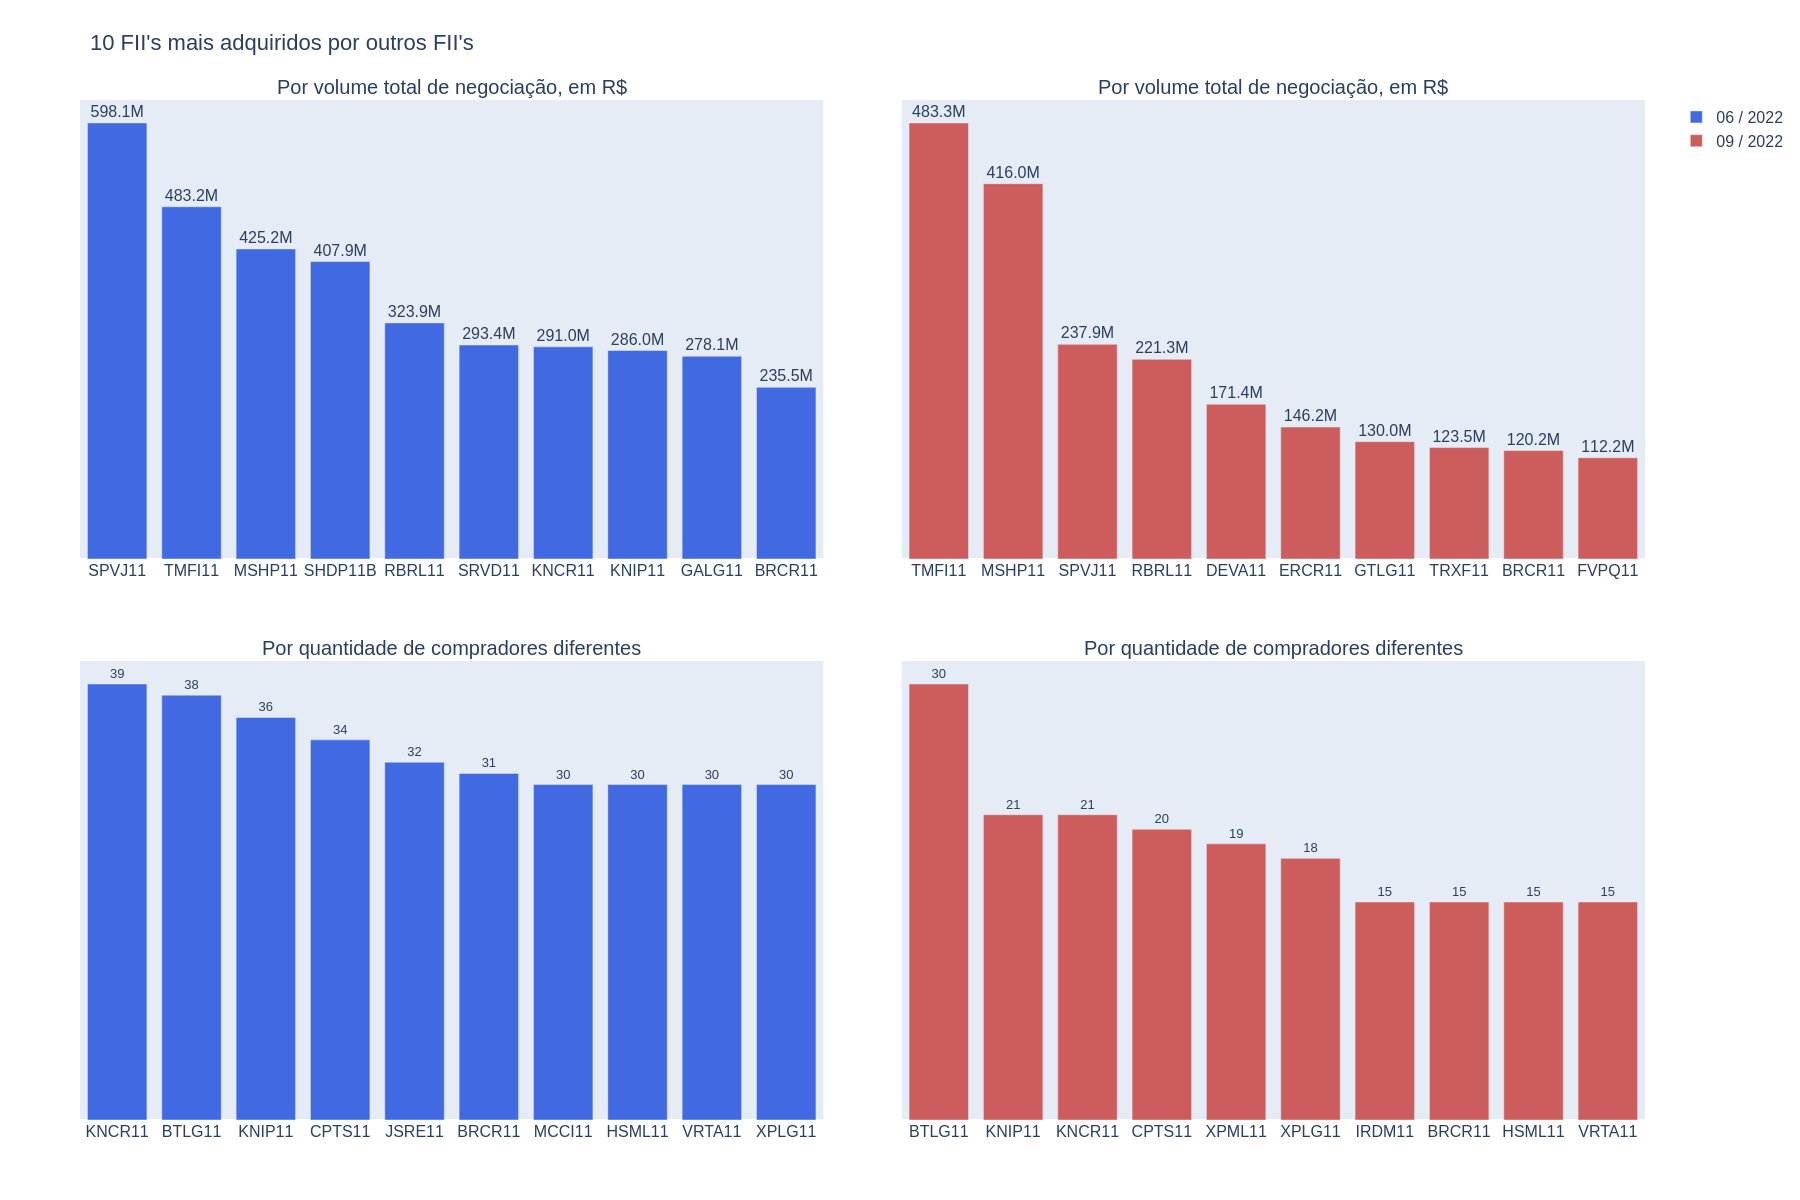

In [30]:
fig = make_subplots(rows=2, cols=2, subplot_titles = ['Por volume total de negociação, em R$', 'Por volume total de negociação, em R$', "Por quantidade de compradores diferentes", "Por quantidade de compradores diferentes"], 
                    vertical_spacing = 0.1, horizontal_spacing = 0.05, column_widths=[5 , 5])

fig.add_trace(go.Bar(
    x=group_06_2022_valor.Ticker,
    y=group_06_2022_valor.Valor,
    texttemplate = "%{y:.4s}",
    textposition='outside',
    xperiodalignment="middle",
    xhoverformat="Q%q",
    hovertemplate="%{y}%{_xother}",
    name="06 / 2022",
    marker_color= '#4169E1',
    textfont=dict(size=16)
),row = 1, col = 1, secondary_y=False,)

fig.add_trace(go.Bar(
    x=group_09_2022_valor.Ticker,
    y=group_09_2022_valor.Valor,
    texttemplate = "%{y:.4s}",
    textposition='outside',
    xperiodalignment="middle",
    xhoverformat="Q%q",
    hovertemplate="%{y}%{_xother}",
    name="09 / 2022",
    marker_color='indianred',
   textfont=dict(size=16)
),row = 1, col = 2, secondary_y=False,)


fig.add_trace(go.Bar(
    x=group_06_2022_qt.Ticker,
    y=group_06_2022_qt.Quantidade,
    text= group_06_2022_qt.Quantidade,
    textposition='outside',
    xperiodalignment="middle",
    xhoverformat="Q%q",
    hovertemplate="%{y}%{_xother}",
    showlegend = False,
    marker_color= '#4169E1',
    textfont=dict(size=13)
),row = 2, col = 1, secondary_y=False,)

fig.add_trace(go.Bar(
    x=group_09_2022_qt.Ticker,
    y=group_09_2022_qt.Quantidade,
    text=group_09_2022_qt.Quantidade,
    textposition='outside',
    xperiodalignment="middle",
    xhoverformat="Q%q",
    hovertemplate="%{y}%{_xother}",
    showlegend = False,
    marker_color='indianred',
   textfont=dict(size=13)
),row = 2, col = 2, secondary_y=False,)

fig.update_yaxes(showgrid=False, showticklabels=False)

fig.update_layout(height=1200, width=1800, title_text="10 FII's mais adquiridos por outros FII's", font=dict(
        size=16,
        ))

for i in fig['layout']['annotations']:
    i['font'] = dict(size=20)

fig.show('png')